# Time, Law of Large Numbers and Central limit 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import time

print("time.time(): %f " %  time.time())
print(time.localtime( time.time() ) )
print(time.asctime( time.localtime(time.time()) ) )

time.time(): 1544477347.270789 
time.struct_time(tm_year=2018, tm_mon=12, tm_mday=11, tm_hour=5, tm_min=29, tm_sec=7, tm_wday=1, tm_yday=345, tm_isdst=0)
Tue Dec 11 05:29:07 2018


In [4]:
N = int(1e5)
v1 = np.arange(N)
v2 = np.random.rand(N)

print(len(v1) == len(v2))

True


In [5]:
t1_for = time.time() 
sum_for = 0
for i in range(N):
    sum_for += v1[i]*v2[i]
t2_for = time.time()

sum_for = np.round(sum_for,3)
time_for= t2_for - t1_for

print('v1 dot v2 use for loop:', sum_for)
print('time spent:', time_for)

t1_np  = time.time() 
sum_np = 0
sum_np = np.round(v1.dot(v2),3)
t2_np  = time.time() 
time_np= t2_np - t1_np

print('\nv1 dot v2 use np.dot():', sum_np)
print('time spent:', time_np)

print('\nsame answer?',sum_np == sum_for )

v1 dot v2 use for loop: 2492234048.963
time spent: 0.40445995330810547

v1 dot v2 use np.dot(): 2492234048.963
time spent: 0.031846046447753906

same answer? True


In [6]:
## use np.random.randint(a,b,n) -- randomly generated n integers  [a,b)
## each number has the same chance to be drown

print('10 random integers between [0,2):',np.random.randint(0,2,10) )
print('10 random integers between [1,5):',np.random.randint(1,5,10) ) 

10 random integers between [0,2): [0 0 1 1 0 1 1 1 1 1]
10 random integers between [1,5): [4 4 2 4 3 2 3 3 4 3]


# Law of Large Number

### Flip a fair coin n times, each time corresponds to a random variable $X_i$ follws Bernoulli(1/2). 
### $\mathbb{E}(X_i) = 1/2$ and Var($X_i$) = 1/4


### Each flip corresponds to generate a random integer between 0 and 1. Let $A_n = \frac{S_n}{n}$, where $S_n = \sum_{i=1}^{n} X_i$
### As $n\rightarrow \infty$, Law of Large number asserts that 
### $$A_n\rightarrow \mathbb{E}(X_i)=1/2$$ with probability 1

time spent on the experiment =  0.2878410816192627


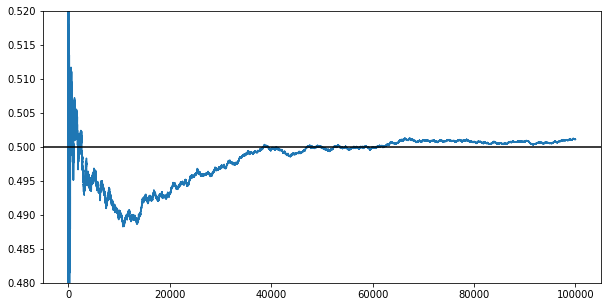

In [7]:
## I want n goes to large, say 10000

t1 = time.time()
i  = 0
n  = int(1e5)
Si = 0
flip_mean = np.zeros(n)
while(i<n):

    Xi = np.random.randint(0,2)
    
    Si = Si + Xi
    
    Ai = Si/(i+1)
    
    flip_mean[i] = Ai
    i += 1
t2 = time.time()

print('time spent on the experiment = ', t2-t1)

plt.figure(figsize=(10,5))
plt.plot(flip_mean);
plt.axhline(0.5, c='black')
plt.ylim([0.480,0.520])
plt.style.use('ggplot')
plt.show()

In [9]:
## Method two: generate n  = int(1e5) many samples all together
## and compute the average from 0th to the kth

n  = int(1e5)
t1 = time.time()
flips = np.random.randint(0,2,n)
t2 = time.time()
flip_mean = np.array([np.sum(flips[:i])/(i+1) for i in range(n)])
t3 = time.time()

print(t2-t1)
print(t3-t2)

0.002012968063354492
3.5790581703186035


# Law of Large Number and Central Limit

In [11]:
## function: to throw the coin randomly n times

def throw_a_coin(n):
    result = np.random.randint(0,2,n)
    return result


sample_size = 10
X  = throw_a_coin(sample_size)
Sn = X.sum()
An = Sn/sample_size
print('flip = ',X)
print(An)

flip =  [0 0 0 1 0 1 1 0 1 0]
0.4


In [12]:
## function: generate sample_size many samples, each of size
## number_of_samples

def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

make_throws(5,10)

array([0.6, 0.3, 0.3, 0.7, 0.4])

# Show the mean over the observations, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [44]:
make_throws(number_of_samples=20, sample_size=10)

array([ 0.5,  0.5,  0.6,  0.9,  0.3,  0.4,  0.8,  0.4,  0.7,  0.3,  0.6,
        0.4,  0.8,  0.4,  0.5,  0.7,  0.5,  0.5,  0.4,  0.5])

###  Formalize: N (number_of_samples = 20 as the above) random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean
### $$\bar{x}_m(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$



### Define the mean or expectation of the sample means over the set of samples or replications, at a sample size N:

 $$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x}_m(N) ,$$
#### where $\{R\}$ is the set of M replications, and calculate and plot this quantity.
### for the case of   make_throws(number_of_samples=20, sample_size=10), this is to take its mean: $E_{\{R\}}(\bar{x}) = \frac{1}{20} \,\sum_{m=0}^{19} \bar{x}_m(10)$

In [13]:
ErX = np.mean(make_throws(number_of_samples=20, sample_size=10) )
print("mean of the means",ErX)

mean of the means 0.48


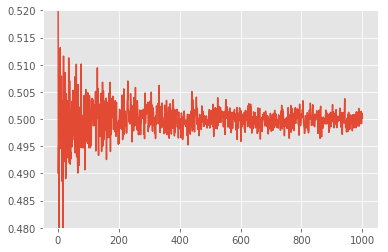

In [14]:
sample_sizes         =  np.arange(1,1001,1)

sample_means         = [make_throws(number_of_samples=200, sample_size=i) 
                        for i in sample_sizes]

mean_of_sample_means = [np.mean(means) for means in sample_means]

plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);
plt.show()

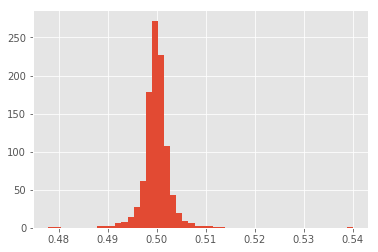

In [15]:
plt.hist(mean_of_sample_means,bins = 50)
plt.show()

### The sampling distribution as a function of sample size
#### The estimated sampling distribution of the mean at different sample sizes.

In [17]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

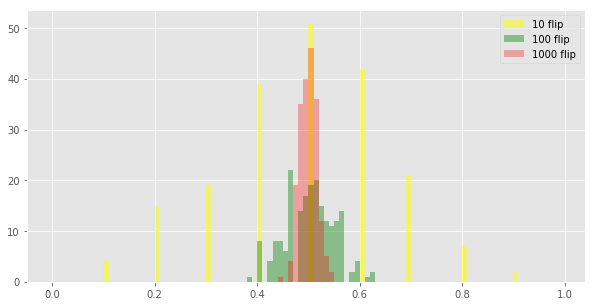

In [49]:
plt.figure(figsize = (10,5))
plt.hist(sample_means_at_size_10, color = 'yellow',
         bins=np.arange(0,1,0.01), label = '10 flip',
         alpha=0.5);
plt.hist(sample_means_at_size_100, color = 'green',
         bins=np.arange(0,1,0.01), label = '100 flip',
         alpha=0.4);
plt.hist(sample_means_at_size_1000, color = 'red',
         bins=np.arange(0,1,0.01), label = '1000 flip',
         alpha=0.3);
plt.style.use('ggplot')
plt.legend()
plt.show()

## Indeed the means as small as 0.1 at a sample size of 10, and as small as 0.3 at a sample size of 100. 

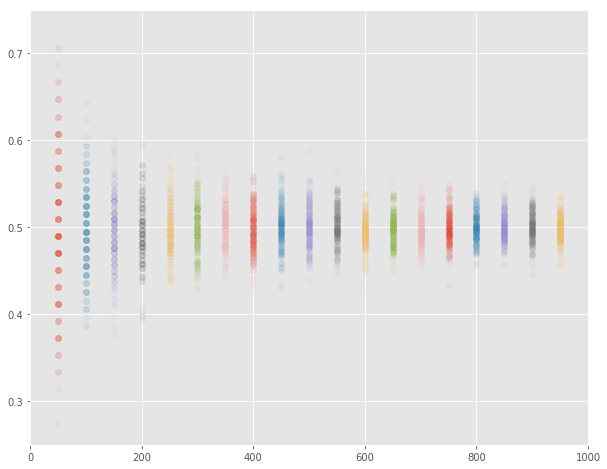

In [18]:
plt.figure(figsize=(10,8))
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.05);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);
plt.show()

## The variation of the sample mean

### $$V_{\{R\}}(N\,\bar{x}) = V_{\{R\}}(\bar{x}_1 + \bar{x}_2 + ... + \bar{x}_N) = V_{\{R\}}(\bar{x}_1) + V_{\{R\}}(\bar{x}_2) + ... + V_{\{R\}}(\bar{x}_N)$$

### Now in the limit of a very large number of replications

### $$\begin{eqnarray}
V_{\{R\}}(N\,\bar{x}) &=& N\, \sigma^2\\
V(\bar{x}) &=& \frac{\sigma^2}{N}
\end{eqnarray}$$

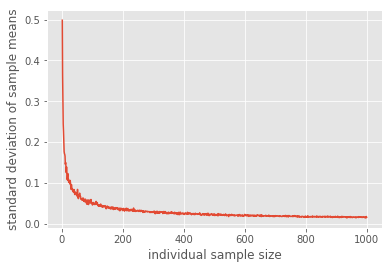

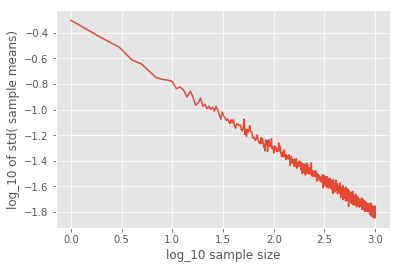

In [19]:
std_of_sample_means = [np.std(means) for means in sample_means]
plt.plot((sample_sizes), (std_of_sample_means));
plt.xlabel('individual sample size')
plt.ylabel('standard deviation of sample means')
plt.show()

plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means));
plt.xlabel('log_10 sample size')
plt.ylabel('log_10 of std( sample means)')

plt.show()



## Plot again the distribution of sample means at a large sample size, N=1000. 

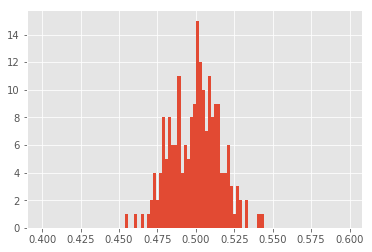

In [20]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));
plt.show()

### The Gaussian Distribution

### The probability density of the normal distribution $N(\mu, \sigma^2)$ is given as:

$$  \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} } .$$

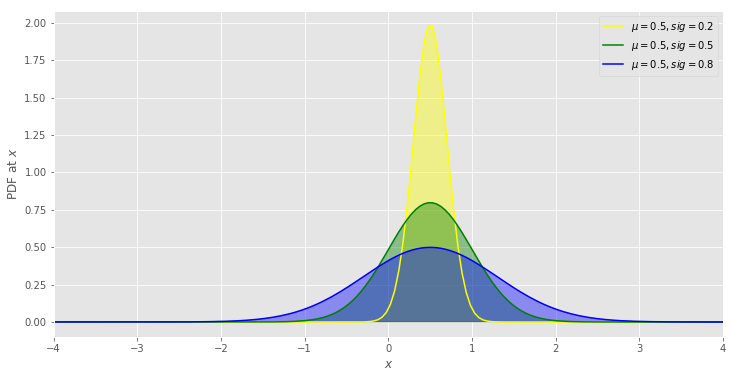

In [21]:
import scipy as sp
import scipy.stats

norm =  sp.stats.norm
x = np.linspace(-5,5, 200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], ['yellow','green','blue']):
    plt.plot(x, norm.pdf(x, mu, sigma),
             c=c, label = r"$\mu = {0:.1f}, sig={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
        
plt.xlim([-4,4])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$");
plt.show()

## The Central Limit Theorem

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$A_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

## $$ A_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

/Users/Sarah/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


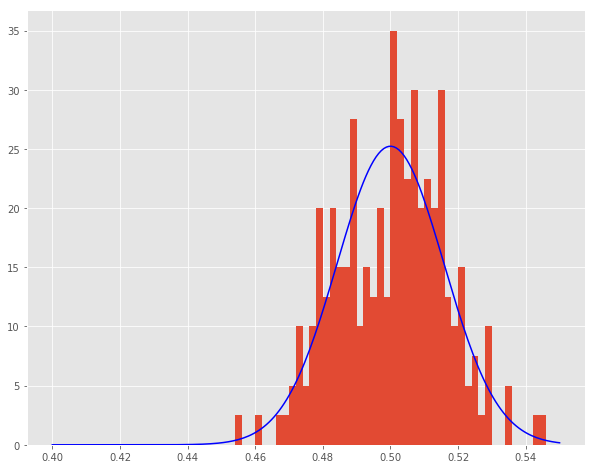

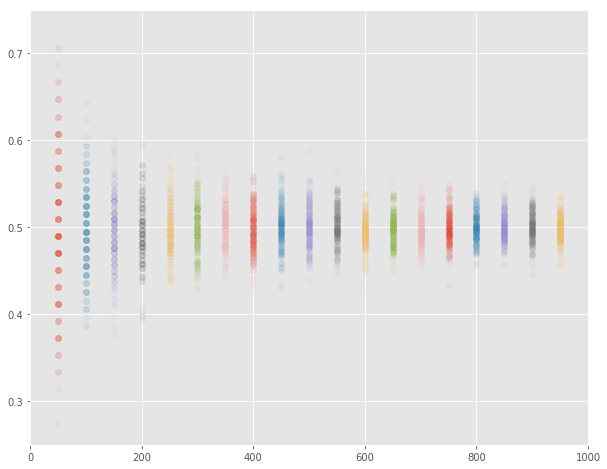

In [23]:
mu   = 0.5
sigma= np.sqrt(0.5*0.5/1000)
x    = np.linspace(0.4,0.55, 200)

plt.figure(figsize=(10,8))
plt.hist(sample_means_at_size_1000, bins=np.arange(0.45,0.55,0.002), normed = 1);
plt.plot(x, norm.pdf(x, mu, sigma),
             c=c, label = r"$\mu = {0:.1f}, sig={1:.1f}$".format(mu, sigma))
plt.show()

plt.figure(figsize=(10,8))
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.05);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);
plt.show()